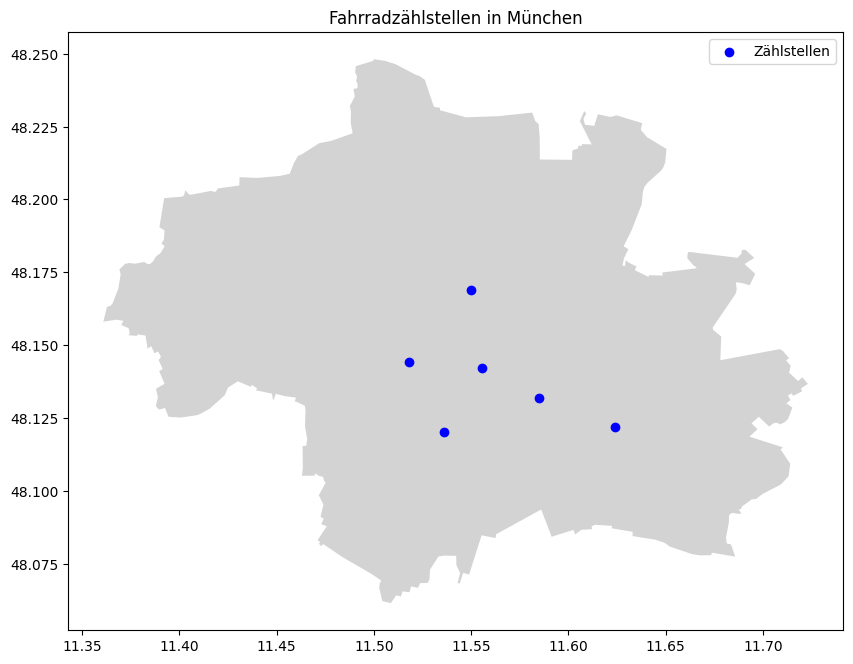

In [22]:
import altair as alt
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

mmap = gpd.read_file('/Users/andreaheigl/Downloads/landkreise_simplify20.geojson')
# CSV-Datei mit den Zählstellen in München
df = pd.read_csv("https://opendata.muenchen.de/dataset/aca4bcb6-d0ff-4634-b5b9-8b5d133ab08e/resource/211e882d-fadd-468a-bf8a-0014ae65a393/download/radzaehlstellen.csv")
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']),crs=4326)

# Plot mit Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
mmap.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='blue', marker='o', label='Zählstellen')
ax.set_title('Fahrradzählstellen in München')
plt.legend()
plt.show()


EPSG:25832


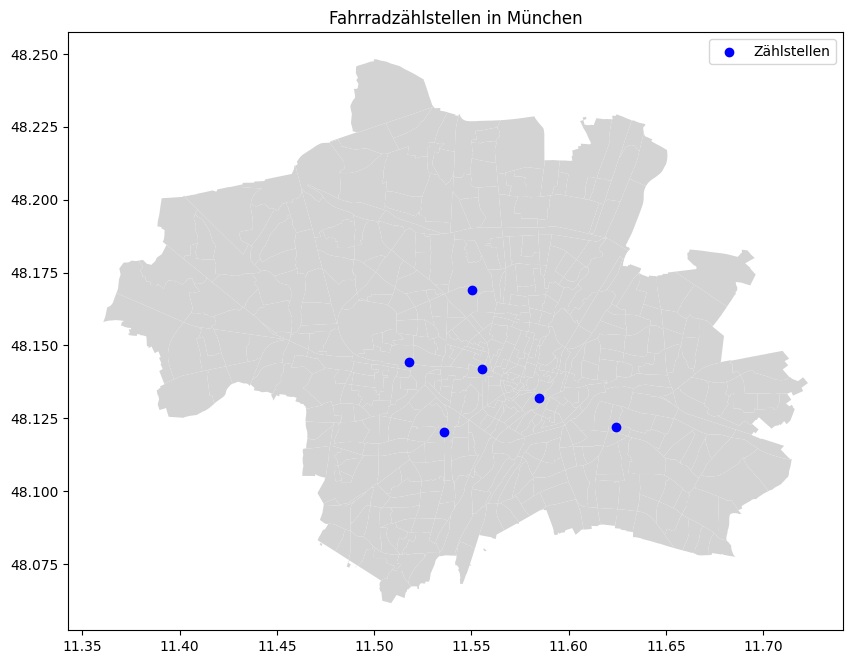

In [20]:
import altair as alt
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

mmap = gpd.read_file('/Users/andreaheigl/Downloads/geojson.json')

# Check the Coordinate Reference System (CRS) of mmap
print(mmap.crs)

df = pd.read_csv("https://opendata.muenchen.de/dataset/aca4bcb6-d0ff-4634-b5b9-8b5d133ab08e/resource/211e882d-fadd-468a-bf8a-0014ae65a393/download/radzaehlstellen.csv")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']), crs=4326)

# If mmap's CRS is different, convert it to crs=4326
mmap = mmap.to_crs(crs=4326)

fig, ax = plt.subplots(figsize=(10, 8))
mmap.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='blue', marker='o', label='Zählstellen')
ax.set_title('Fahrradzählstellen in München')
plt.legend()
plt.show()

In [23]:
# Plot mit Altair
# 1.  mark_geoshape transparently uses the geometry column
basemap = alt.Chart(mmap).mark_geoshape(
    # add some styling to reduce the salience of the basemap
    fill="lightgray", stroke="darkgray"
).properties(width=600, height=600)

# 2.  we use mark_circle to have more control over visual variables
markers = alt.Chart(gdf).mark_circle(opacity=1).encode(
    # point latitude & longitude to coordinates in geometry column
    longitude='geometry.coordinates[0]:Q',
    latitude='geometry.coordinates[1]:Q',
    tooltip=['zaehlstelle'],
)
# combine the two layers 
basemap + markers

alt.LayerChart(...)

In [7]:
pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 3.1 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
